<a href="https://colab.research.google.com/github/aperi-j/NULL/blob/main/Capstone_current4_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Understanding

Importing the necessary libraries

In [ ]:
#importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import emoji
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df = pd.read_csv('/content/go_emotions_dataset.csv')
df.head()

,id,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,eew5j0j,That game hurt.,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,eemcysk,>sexuality shouldn’t be a grouping category I...,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ed2mah1,"You do right, if you don't care then fuck 'em!",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,eeibobj,Man I love reddit.,False,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,eda6yn6,"[NAME] was nowhere near them, he was by the Fa...",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.tail(30)

,id,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
211195,efeojyv,"Everytime I see this, I can't help but feel so...",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
211196,eep7dvz,Me neither :/ devastating actually. As all his...,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
211197,ed88cu5,Not true. backtested analysis shows that 85% s...,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211198,ed88cu5,Not true. backtested analysis shows that 85% s...,False,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
211199,ef6xgh0,Isn't there a sub for tomorrow exact post?,False,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
211200,eevc2j7,Like taking a life from someone without their ...,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
211201,ee066bm,Plus it's prettier.,False,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211202,eelj139,Yes!!!!!! She’s a hot mess!,False,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211203,ef8mcsc,Perhaps you are right and the stereotype that ...,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
211204,ee0ep6h,Imagine being on community that is literally e...,False,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211225 entries, 0 to 211224
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    211225 non-null  object
 1   text                  211225 non-null  object
 2   example_very_unclear  211225 non-null  bool  
 3   admiration            211225 non-null  int64 
 4   amusement             211225 non-null  int64 
 5   anger                 211225 non-null  int64 
 6   annoyance             211225 non-null  int64 
 7   approval              211225 non-null  int64 
 8   caring                211225 non-null  int64 
 9   confusion             211225 non-null  int64 
 10  curiosity             211225 non-null  int64 
 11  desire                211225 non-null  int64 
 12  disappointment        211225 non-null  int64 
 13  disapproval           211225 non-null  int64 
 14  disgust               211225 non-null  int64 
 15  embarrassment    

In [ ]:
df.shape

(211225, 31)

In [ ]:
df.describe()

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
count,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,...,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000
mean,0.081103,0.043768,0.038272,0.064472,0.083418,0.028401,0.034840,0.045885,0.018071,0.040095,...,0.038779,0.008569,0.041259,0.006164,0.041591,0.006102,0.011954,0.031994,0.026105,0.261797
std,0.272994,0.204580,0.191853,0.245592,0.276514,0.166116,0.183374,0.209236,0.133208,0.196182,...,0.193067,0.092172,0.198890,0.078269,0.199653,0.077880,0.108679,0.175985,0.159448,0.439614
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Checking for missing values
df.isna().sum()

id                      0
text                    0
example_very_unclear    0
admiration              0
amusement               0
anger                   0
annoyance               0
approval                0
caring                  0
confusion               0
curiosity               0
desire                  0
disappointment          0
disapproval             0
disgust                 0
embarrassment           0
excitement              0
fear                    0
gratitude               0
grief                   0
joy                     0
love                    0
nervousness             0
optimism                0
pride                   0
realization             0
relief                  0
remorse                 0
sadness                 0
surprise                0
neutral                 0
dtype: int64

There are no missing values present in the dataset

In [ ]:
#Checking for the example_very_unclear boolean
value_counts = df['example_very_unclear'].value_counts()
value_counts

False    207814
True       3411
Name: example_very_unclear, dtype: int64

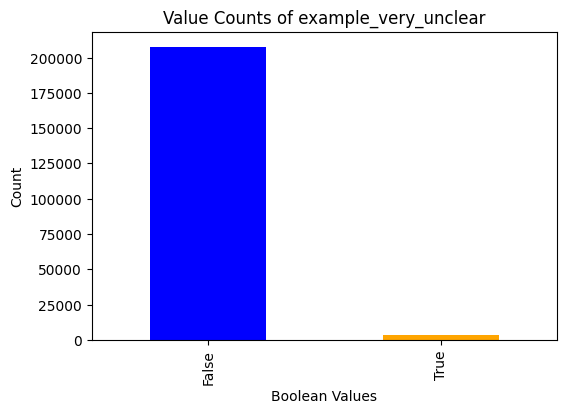

In [ ]:
import matplotlib.pyplot as plt

#Plotting to represent the above
plt.figure(figsize=(6, 4))
value_counts.plot.bar(color=['blue', 'orange'])

# Set plot title and axis labels
plt.title('Value Counts of example_very_unclear')
plt.xlabel('Boolean Values')
plt.ylabel('Count')

# Display the plot
plt.show()

In [ ]:
#Dropping the rows with True as the Boolean Value
df = df.drop(df[df['example_very_unclear'] == True].index)
#Executing a new populated index
df = df.reset_index(drop=True)
df

,id,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,eew5j0j,That game hurt.,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,ed2mah1,"You do right, if you don't care then fuck 'em!",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,eeibobj,Man I love reddit.,False,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,eda6yn6,"[NAME] was nowhere near them, he was by the Fa...",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,eespn2i,Right? Considering it’s such an important docu...,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207809,ed89acy,"Well, I'm glad you're out of all that now. How...",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
207810,ee6pagw,Everyone likes [NAME].,False,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
207811,ef28nod,Well when you’ve imported about a gazillion of...,False,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
207812,ee8hse1,That looks amazing,False,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Checking for correlation between the emotions
df_emot = df.iloc[:,3:-2]
df_emot

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207809,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
207810,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
207811,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
207812,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

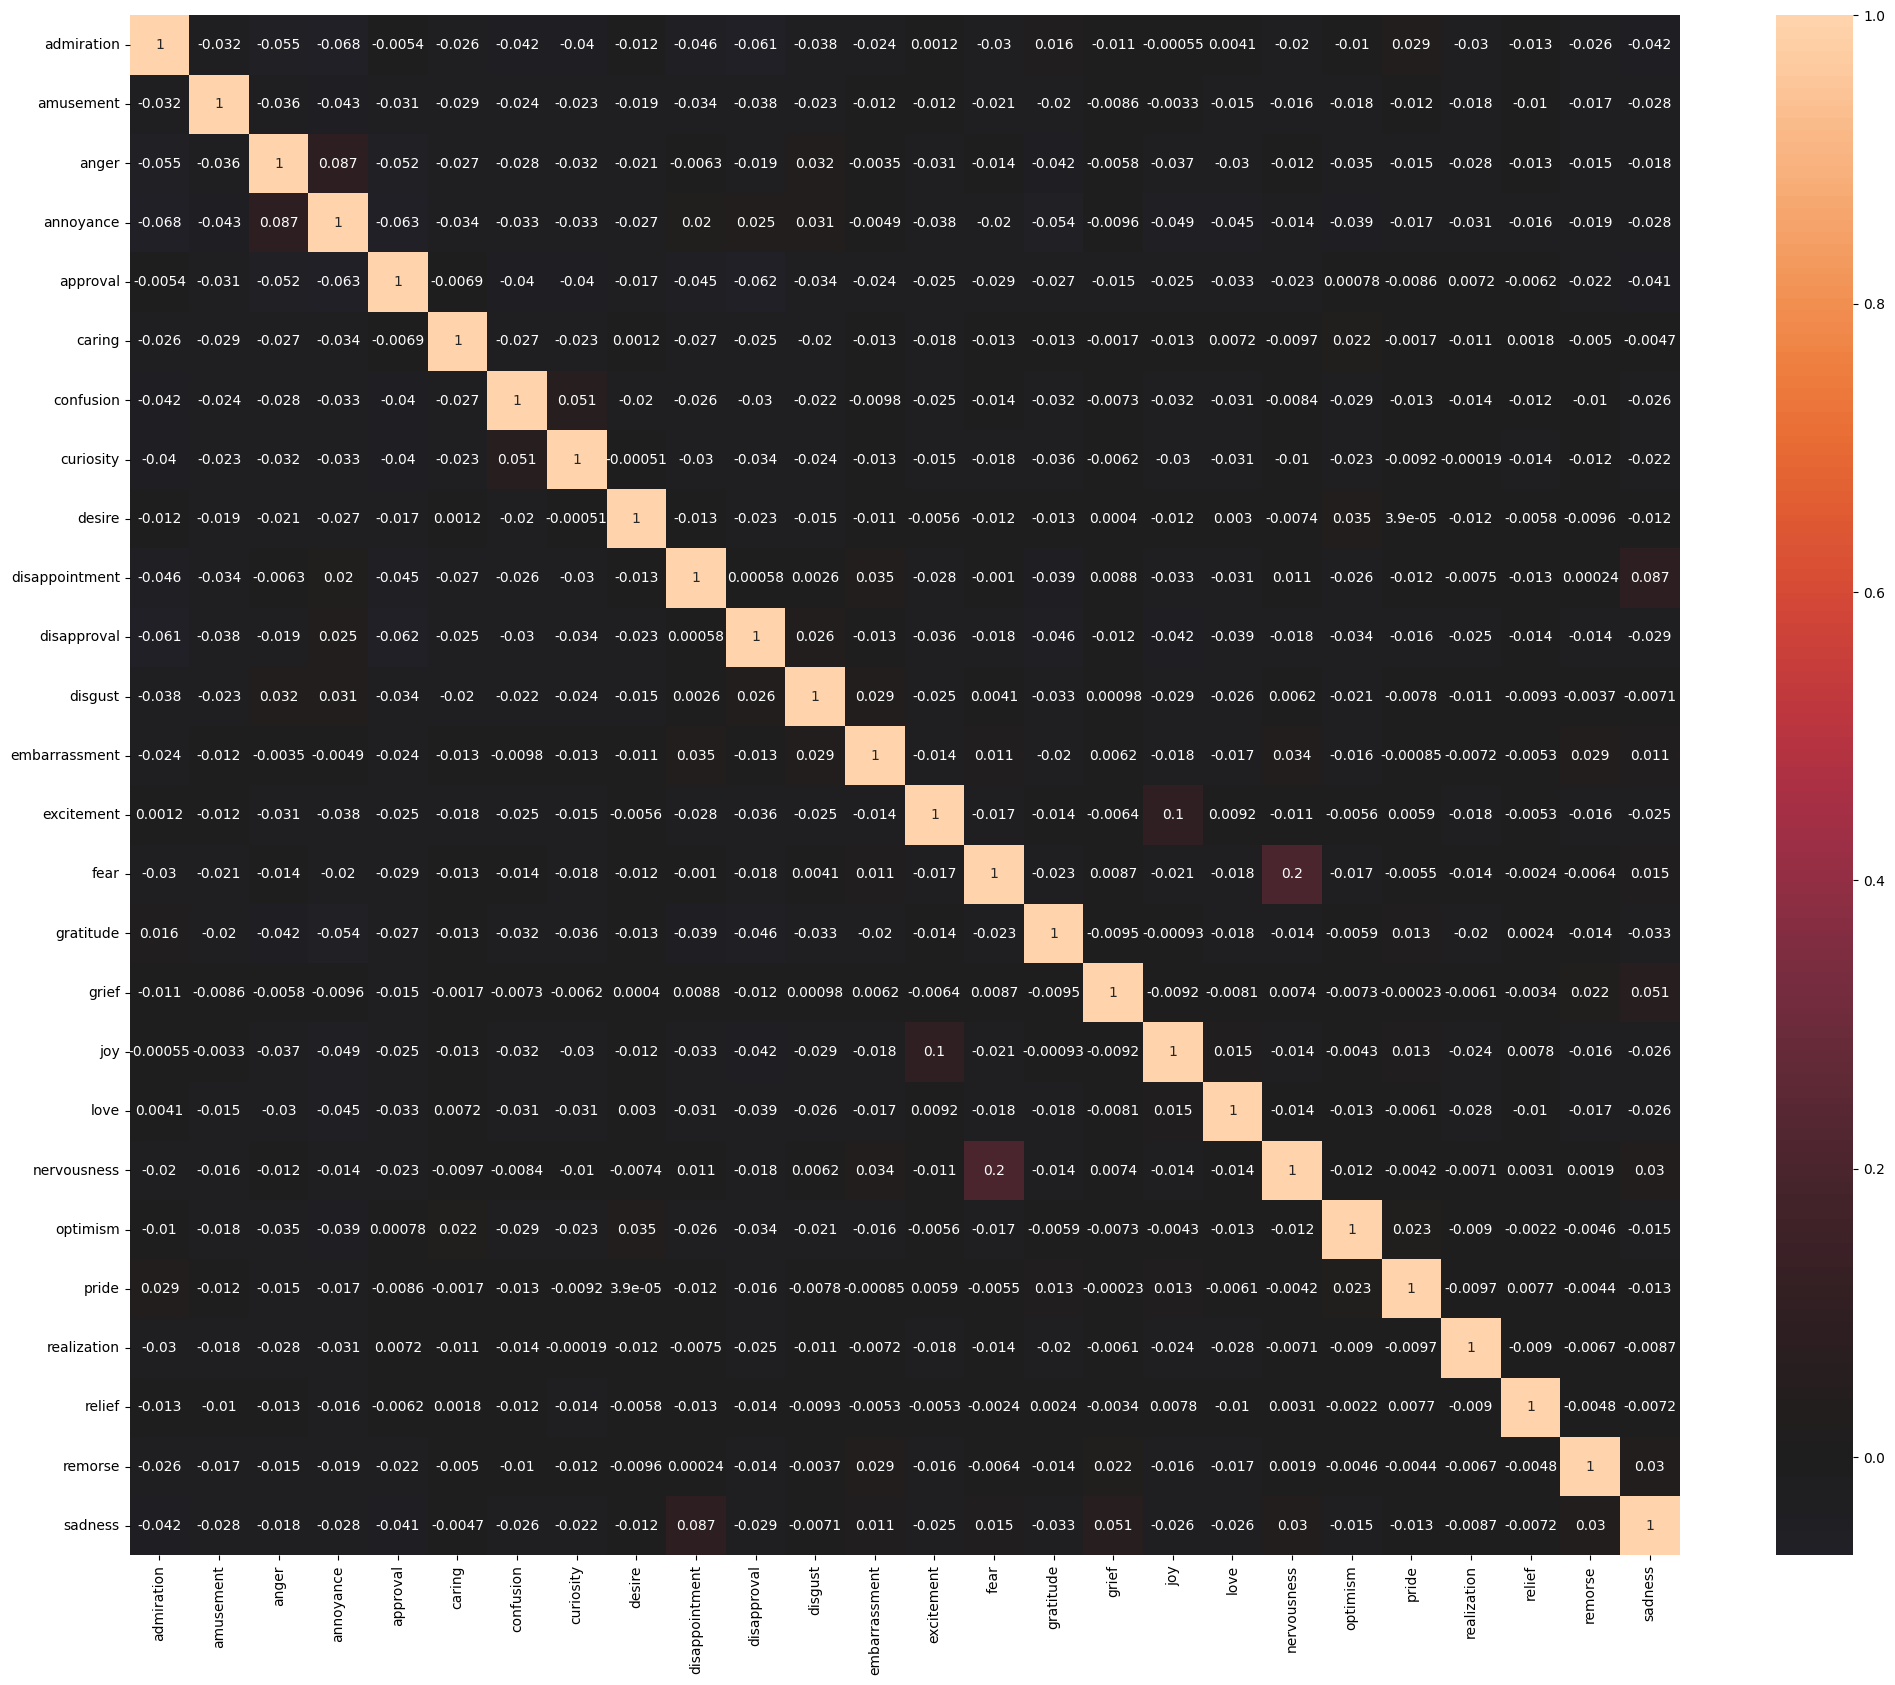

In [ ]:
import seaborn as sns
#Plotting the heat map
plt.figure(figsize=(25,20))
sns.heatmap(df_emot.corr(), center=0, annot=True)

We dropped the rows with True boolean functions for the example_very_unclear column as they represented < 25000 counts

In [ ]:
#checking for duplicates in the id column
duplicates_id = df[df.duplicated(subset = 'id')]
duplicates_id

,id,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
241,efdj121,"[NAME] to [NAME]: ""Don't try and tell me how t...",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
323,edl7cr3,"""Sponge Blurb Pubs Quaw Haha GURR ha AAa!"" fin...",False,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
341,ef93ffh,"You're both wrong NBA is an initialism, can't ...",False,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
395,ed6c8bw,Yes the ammo health thing really is a chore. T...,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
726,eeu5haj,"If you had a giant rock on your land, and you ...",False,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207809,ed89acy,"Well, I'm glad you're out of all that now. How...",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
207810,ee6pagw,Everyone likes [NAME].,False,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
207811,ef28nod,Well when you’ve imported about a gazillion of...,False,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
207812,ee8hse1,That looks amazing,False,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Checking for duplicates in the text column
duplicates_text = df[df.duplicated(subset = 'text')]
duplicates_text

,id,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
241,efdj121,"[NAME] to [NAME]: ""Don't try and tell me how t...",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
323,edl7cr3,"""Sponge Blurb Pubs Quaw Haha GURR ha AAa!"" fin...",False,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
341,ef93ffh,"You're both wrong NBA is an initialism, can't ...",False,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
395,ed6c8bw,Yes the ammo health thing really is a chore. T...,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
726,eeu5haj,"If you had a giant rock on your land, and you ...",False,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207809,ed89acy,"Well, I'm glad you're out of all that now. How...",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
207810,ee6pagw,Everyone likes [NAME].,False,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
207811,ef28nod,Well when you’ve imported about a gazillion of...,False,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
207812,ee8hse1,That looks amazing,False,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
type(duplicates_text)

pandas.core.frame.DataFrame

text - 153493
id - 153214

There are duplicated rows. We will not drop them for now as they could represent multiple text entries by the same user i.d

In [ ]:
df.shape

(207814, 31)

In [ ]:
df['text'].nunique()

57730

In [ ]:
#Dropping the example_very_unclear column
df.drop('example_very_unclear', inplace = True, axis = 1)


In [ ]:
#splitting the dataframes into text and labels
#Labels
labels_df = df.iloc[:,3:]
labels_df

,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207809,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
207810,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
207811,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
207812,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Text
text_df = df.iloc[:,[1]]
text_df


,text
0,That game hurt.
1,"You do right, if you don't care then fuck 'em!"
2,Man I love reddit.
3,"[NAME] was nowhere near them, he was by the Fa..."
4,Right? Considering it’s such an important docu...
...,...
207809,"Well, I'm glad you're out of all that now. How..."
207810,Everyone likes [NAME].
207811,Well when you’ve imported about a gazillion of...
207812,That looks amazing


In [ ]:
!pip install emoji

In [ ]:
#Demojising the text column
text_df['De_emojized'] = text_df['text'].apply(lambda x: emoji.demojize(x))
text_df

<ipython-input-52-915b23d1c2dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['De_emojized'] = text_df['text'].apply(lambda x: emoji.demojize(x))


,text,De_emojized
0,That game hurt.,That game hurt.
1,"You do right, if you don't care then fuck 'em!","You do right, if you don't care then fuck 'em!"
2,Man I love reddit.,Man I love reddit.
3,"[NAME] was nowhere near them, he was by the Fa...","[NAME] was nowhere near them, he was by the Fa..."
4,Right? Considering it’s such an important docu...,Right? Considering it’s such an important docu...
...,...,...
207809,"Well, I'm glad you're out of all that now. How...","Well, I'm glad you're out of all that now. How..."
207810,Everyone likes [NAME].,Everyone likes [NAME].
207811,Well when you’ve imported about a gazillion of...,Well when you’ve imported about a gazillion of...
207812,That looks amazing,That looks amazing


In [ ]:
#Confirming the demojization
text_df.tail(11)

,text,De_emojized
207803,What a great photo and you two look so happy. 😍,What a great photo and you two look so happy. ...
207804,"Wow, she headlines two shows now","Wow, she headlines two shows now"
207805,Youtube is my Wikipedia. Videos about any inte...,Youtube is my Wikipedia. Videos about any inte...
207806,Tell her youre sleeping with someone else. You...,Tell her youre sleeping with someone else. You...
207807,You got banned for participating in a brigade.,You got banned for participating in a brigade.
207808,"Thanks, [NAME]","Thanks, [NAME]"
207809,"Well, I'm glad you're out of all that now. How...","Well, I'm glad you're out of all that now. How..."
207810,Everyone likes [NAME].,Everyone likes [NAME].
207811,Well when you’ve imported about a gazillion of...,Well when you’ve imported about a gazillion of...
207812,That looks amazing,That looks amazing


In [ ]:
# Function for cleaning text
import re

def clean_text(text):
  re_number = re.compile('[0-9]+')
  re_url = re.compile("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+")
  re_tag = re.compile('\[[A-Z]+\]')
  re_char = re.compile('[^0-9a-zA-Z\s?!.,:\'\"//]+')
  re_char_clean = re.compile('[^0-9a-zA-Z\s?!.,\[\]]')
  re_punc = re.compile('[?!,.\'\"]')

  text = re.sub(re_char, "", text) # Remove unknown character
  text = contractions.fix(text) # Expand contraction
  text = re.sub(re_url, ' [url] ', text) # Replace URL with number
  text = re.sub(re_char_clean, "", text) # Only alphanumeric and punctuations.
  #text = re.sub(re_punc, "", text) # Remove punctuation.
  text = text.lower() # Lower text
  text = " ".join([w for w in text.split(' ') if w != " "]) # Remove whitespace

  return text

In [ ]:
!pip install -q preprocessor
!pip install -q contractions

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 10.5 MB/s eta 0:00:00


In [ ]:
import preprocessor
import contractions
from tqdm import tqdm

text_df['cleaned_text'] = text_df['De_emojized'].apply(clean_text)
text_df.head(10)

<ipython-input-25-049bd530ea6c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['cleaned_text'] = text_df['De_emojized'].apply(clean_text)


,text,De_emojized,cleaned_text
0,That game hurt.,That game hurt.,that game hurt.
1,"You do right, if you don't care then fuck 'em!","You do right, if you don't care then fuck 'em!","you do right, if you do not care then fuck them!"
2,Man I love reddit.,Man I love reddit.,man i love reddit.
3,"[NAME] was nowhere near them, he was by the Fa...","[NAME] was nowhere near them, he was by the Fa...","name was nowhere near them, he was by the falc..."
4,Right? Considering it’s such an important docu...,Right? Considering it’s such an important docu...,right? considering its such an important docum...
5,"He isn't as big, but he's still quite popular....","He isn't as big, but he's still quite popular....","he is not as big, but he is still quite popula..."
6,That's crazy; I went to a super [RELIGION] hig...,That's crazy; I went to a super [RELIGION] hig...,that is crazy i went to a super religion high ...
7,that's adorable asf,that's adorable asf,that is adorable asf
8,"""Sponge Blurb Pubs Quaw Haha GURR ha AAa!"" fin...","""Sponge Blurb Pubs Quaw Haha GURR ha AAa!"" fin...",sponge blurb pubs quaw haha gurr ha aaa! final...
9,"I have, and now that you mention it, I think t...","I have, and now that you mention it, I think t...","i have, and now that you mention it, i think t..."


Removing Puntuation, Setting to Lowercase

In [ ]:
import string

#defining a function to remove the punctuation, shift to lower case and tokenize words
def remove_punctuation(text):
  translator = str.maketrans('', '', string.punctuation)
  text = text.replace(" ' ", " ")
  return text

df['No_Punctuation'] = df['text'].apply(remove_punctuation)
df.head()

,id,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,No_Punctuation
0,eew5j0j,That game hurt.,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,That game hurt
1,eemcysk,>sexuality shouldn’t be a grouping category I...,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sexuality shouldn’t be a grouping category It...
2,ed2mah1,"You do right, if you don't care then fuck 'em!",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,You do right if you dont care then fuck em
3,eeibobj,Man I love reddit.,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Man I love reddit
4,eda6yn6,"[NAME] was nowhere near them, he was by the Fa...",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NAME was nowhere near them he was by the Falcon


In [ ]:
text_df[['cleaned_text']]

,cleaned_text
0,that game hurt.
1,"you do right, if you do not care then fuck them!"
2,man i love reddit.
3,"name was nowhere near them, he was by the falc..."
4,right? considering its such an important docum...
...,...
207809,"well, i am glad you are out of all that now. h..."
207810,everyone likes name.
207811,well when you have imported about a gazillion ...
207812,that looks amazing
